# Variable source light curves

See [NASA anaimation](https://www.nasa.gov/feature/goddard/2023/nasa-s-fermi-captures-dynamic-gamma-ray-sky-in-new-animation)

To replace the zip file:
```
scp iana:/sdf/home/b/burnett/work/bb_light_curves/files/lcr.zip files/lcr.zip
```

Failed, need fixing:
```
Saving BBLC to files/lcr/4FGL_J0427.3+0504.pkl
Saving BBLC to files/lcr/4FGL_J2136.2+0032.pkl
Saving BBLC to files/lcr/4FGL_J1435.9-8348.pkl
Saving BBLC to files/lcr/4FGL_J0051.5-4220.pkl
```

Loaded Fermi 4FGL-DR3 gll_psc_v28.fit: 6659 entries
Selected 602 variable sources for BBLC generation
Loaded zip LC repository: 598 entries.
*** Missing 4 souurces


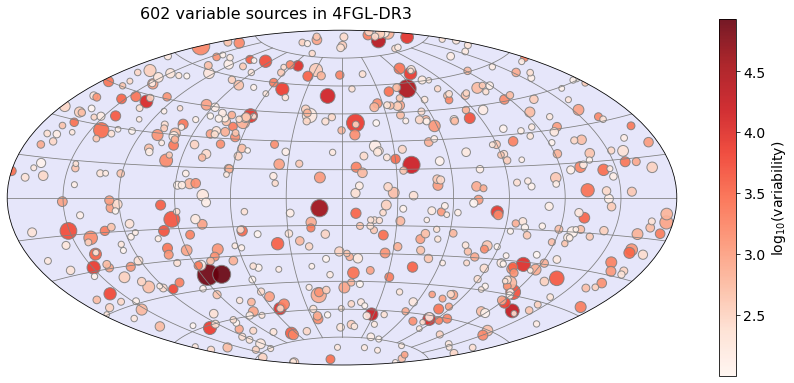

In [1]:
%run animation/make_bblc
self = LightCurves(BBLCR(),  load_vars())   
self.plot_static();

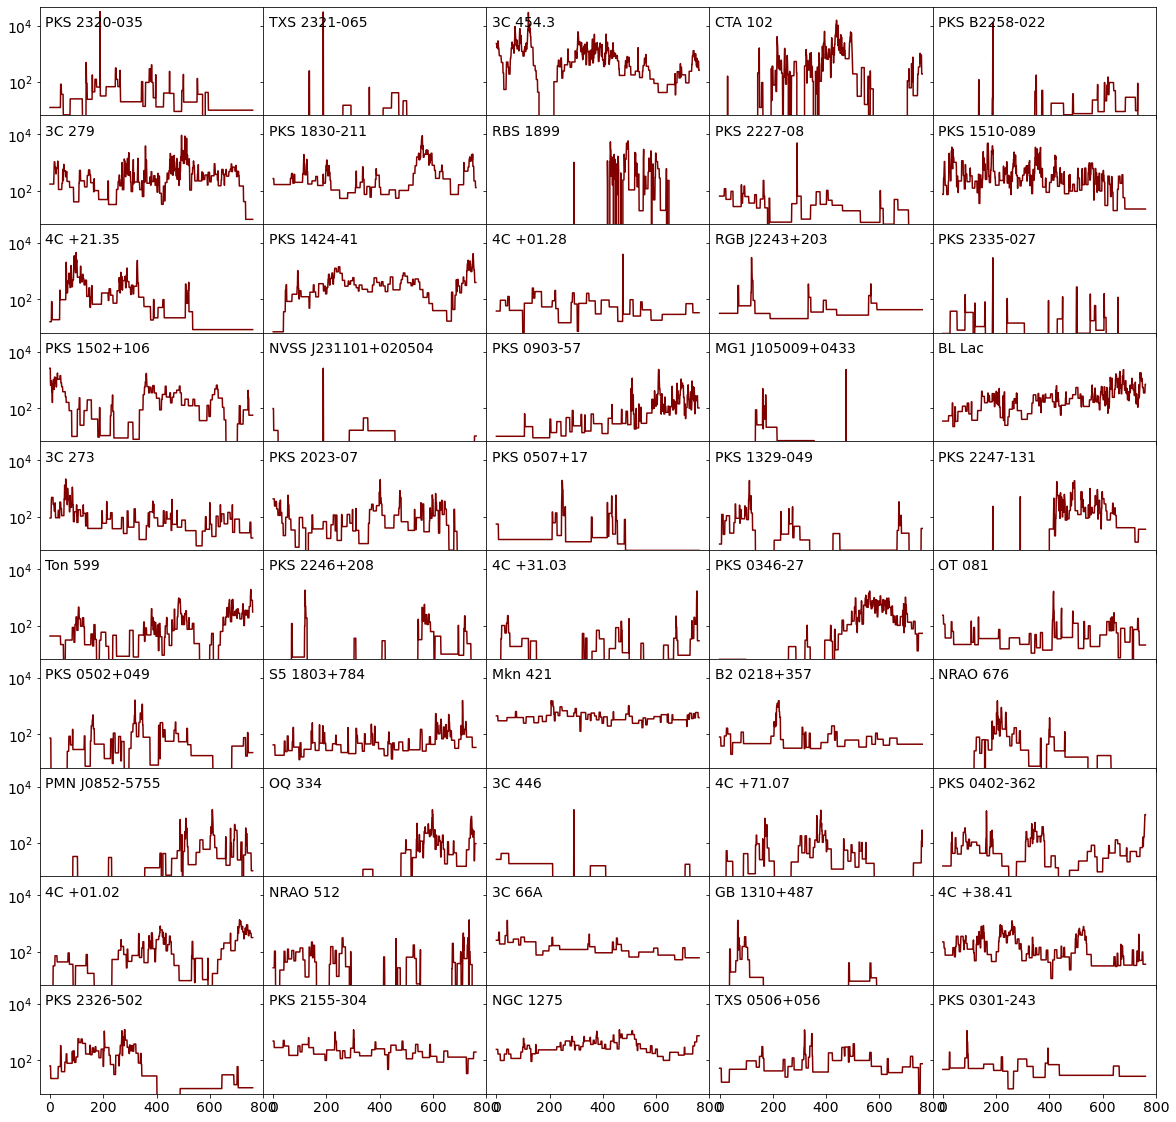

In [2]:
peaks = np.array([np.max(y[1] ) for y in self])
sortidx = np.argsort(peaks)[::-1]

sortlc = [self[i] for i in sortidx[:50]]

fig, axx = plt.subplots(ncols=5, nrows=10, figsize=(20,20), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0, hspace=0)
for (name, lc), ax  in zip(sortlc, axx.flatten()):
    ax.semilogy(np.arange(len(lc)), lc, color='maroon')
    ax.text(0.025,0.92, self.cat.loc[name].assoc1_name,  
            transform=ax.transAxes, va='top')